In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Analysis of `moxie` simulations

`moxie` is an agent-based model of optimization-centric science. The model conceptualizes science as a navigation problem on an "epistemic landscape", i.e., an optimization problem. Each point on this landscape is one possible solution to the scientific problem, and the "elevation" of the point represents the utility of the solution (NB: the landscapes can also be high dimensional). Such research programs can most often be found in applied sciences dealing with complex biological, social, or technological systems, and in which progress is made in large degree through trial-and-error. For example, two dimensions of a landscape may be the dose of a drug, and the frequency of administering it, whereas the utility may be in this case the proportion of patients that fully recover.

In this analysis, we investigate the role of three factors on the cumulative utility generated by searching the epistemic landscape. First, we investigate how do the properties of the landscape affect the success of the search. We use two exemplar landscapes - dubbed "kind" and "wicked". Second, we investigate the effect of two design strategies (i.e., strategies of proposing solutions) - the random strategy and the random One Factor At a time (OFAT). And third, we investigate what role do various strategies of replicating studies have. We test three replication strategies: no replications, random replications, and targeted replications.

In [2]:
# Load the simulation data
df_sim = pd.read_pickle("moxie_sims_200iter.pickle")

In [3]:
# Display summary statistics
# How final cumulative discounted utility depends on the three factors?
(df_sim[["landscape_type","design_strategy", "replication_strategy", "final_disc_cumsum_true_util"]]
     .groupby(by=["landscape_type", "design_strategy", "replication_strategy"])
     .describe())

final_disc_cumsum_true_util  \
                                                                          count   
landscape_type design_strategy replication_strategy                               
kind           random          none                                       200.0   
                               random                                     200.0   
                               targeted                                   200.0   
               random_ofat     none                                       200.0   
                               random                                     200.0   
                               targeted                                   200.0   
wicked         random          none                                       200.0   
                               random                                     200.0   
                               targeted                                   200.0   
               random_ofat     none                                       200.0   
                               random                                     200.0   
                               targeted                                   200.0   

                                                                          \
                                                          mean       std   
landscape_type design_strategy replication_strategy                        
kind           random          none                  22.866640  1.540273   
                               random                22.731079  1.656966   
                               targeted              23.308716  1.152083   
               random_ofat     none                  23.751342  1.034724   
                               random                23.240410  1.335581   
                               targeted              23.350054  1.237075   
wicked         random          none                  16.075650  2.984389   
                               random                15.456136  2.838802   
                               targeted              16.826708  1.849625   
               random_ofat     none                  13.112674  4.206690   
                               random                12.819915  4.782474   
                               targeted              12.588129  4.471349   

                                                                           \
                                                           min        25%   
landscape_type design_strategy replication_strategy                         
kind           random          none                  17.109629  22.020330   
                               random                17.061534  21.676657   
                               targeted              20.159405  22.488702   
               random_ofat     none                  19.973827  23.180994   
                               random                15.145330  22.466559   
                               targeted              19.668558  22.647394   
wicked         random          none                   4.779343  14.576209   
                               random                 6.498123  13.657943   
                               targeted              11.686291  15.620880   
               random_ofat     none                   2.827927  10.007231   
                               random                 0.015805  10.192603   
                               targeted               0.110591   9.713514   

                                                                           \
                                                           50%        75%   
landscape_type design_strategy replication_strategy                         
kind           random          none                  23.159346  23.875720   
                               random                22.771601  24.090973   
                               targeted              23.425690  24.226328   
               random_ofat     none            

## Do replication strategies have an effect on cumulative utility?

We can plot the data to answer this qualitatively.

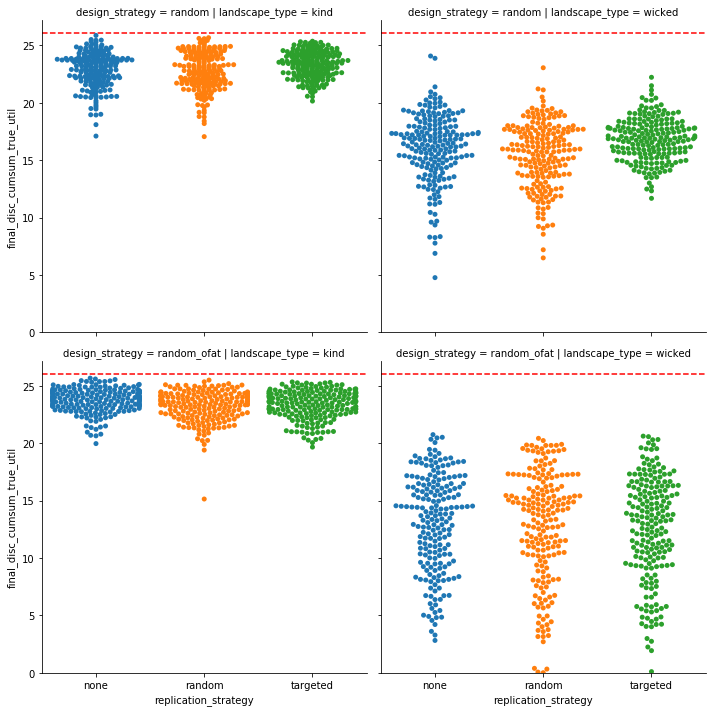

In [4]:
g = sns.catplot(x="replication_strategy", y="final_disc_cumsum_true_util",\
            col="landscape_type", row="design_strategy", kind="swarm", data=df_sim);

# Add horizontal guide for maximum obtainable cumulative utility
DISCOUNT_FACTOR = 0.97 # This is a parameter of the simulation (NB: modify if it was changed in simulation)
MAX_STEPS = 50 # This is a parameter of the simulation (NB: modify if it was changed in simulation)
max_cumsum_util = np.sum(DISCOUNT_FACTOR**np.arange(MAX_STEPS) * np.ones(MAX_STEPS)) # Assumes max util per step = 1.0

for row in g.axes:
    for ax in row:
        ax.axhline(max_cumsum_util, ls='--', color="red");
        ax.set_ylim(0,)

It appears that the replication strategies have little effect on the cumulative utility. The only apparent benefit is observed in the case of using a random design strategy and a targeted replication strategy. In this case, the replications seem to reduce the variance of cumulative utility, eliminating the instances with very low utility.

On the other hand, the type of the landscape clearly plays a large role in the cumulative utility that is obtained.

## Do design strategies have an effect on cumulative utility?

Having observed that replication strategies have little effect, we can just select the simulation without replications, and investigate if the two design strategies differ.

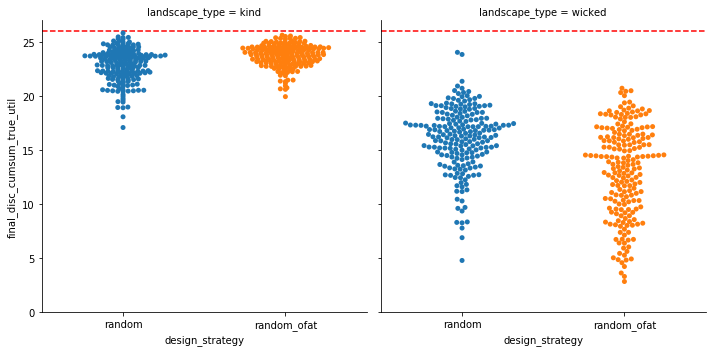

In [5]:
g = sns.catplot(x="design_strategy", y="final_disc_cumsum_true_util",\
            col="landscape_type", kind="swarm", data=df_sim[df_sim.replication_strategy == "none"]);

# Add horizontal guide for maximum obtainable cumulative utility
DISCOUNT_FACTOR = 0.97 # This is a parameter of the simulation (NB: modify if it was changed in simulation)
MAX_STEPS = 50 # This is a parameter of the simulation (NB: modify if it was changed in simulation)
max_cumsum_util = np.sum(DISCOUNT_FACTOR**np.arange(MAX_STEPS) * np.ones(MAX_STEPS)) # Assumes max util per step = 1.0

for row in g.axes:
    for ax in row:
        ax.axhline(max_cumsum_util, ls='--', color="red");
        ax.set_ylim(0,)

The design strategy and the landscape type appear to interact: the best choice of design strategy will depend on the landscape type.